# Explore some recomendation strategies for follower recomendation


Some Ideas:
- Most Followed, followee of followees?
    - Triad completion?
- A Page Rank Type Thing?
    - https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#pagerank
    - A problem is that we would only recommend locally popular people?
    
- Community Detection
    - https://networkx.org/documentation/stable/reference/algorithms/community.html
    

Can we mix two to get second degree, so we balance popular and less popular people?


I think we are trying to do like an edge prediction task?
- 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import pickle

In [3]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

## Use the karate club dataset!

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


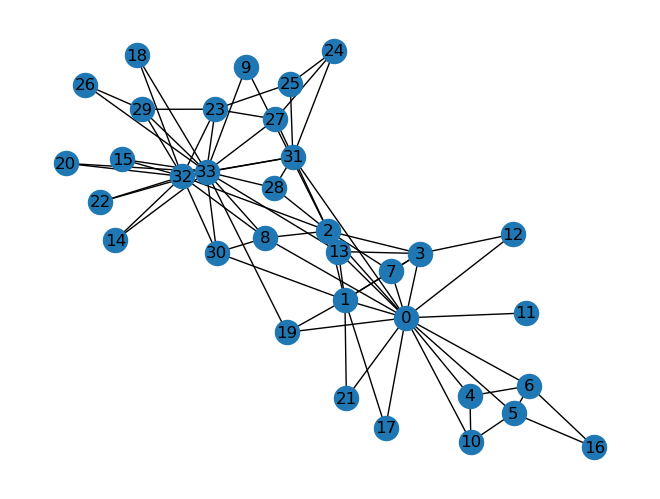

In [4]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_spring(G, with_labels=True, )
plt.show()

In [5]:
positive_test = [(30, 1), (5 ,16), (15, 18)]

negative_test = [(20, 21), (19, 28), (11, 10)]

In [6]:
communities = list(nx.community.girvan_newman(G))

In [7]:
communities[0]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [9]:
pr = nx.pagerank(G, alpha=0.9)


## Read in hci.social network

In [63]:
with open("followers_dict.pkl", "rb") as file: 
    followers_dict = pd.read_pickle(file)
    
with open("following_dict.pkl", "rb") as file: 
    following_dict = pd.read_pickle(file)   

In [64]:
df_profiles = pd.read_csv("data/profiles/hci_social_profiles_local.csv")

In [65]:
df_profiles.head()

,id,acct,url,created_at,followers_count,following_count,statuses_count,last_status_at,instance
0,108286624813793740,cqz,https://hci.social/@cqz,2022-05-12T00:00:00.000Z,48,20,24,2023-11-03,https://hci.social/
1,108286142941695868,Gillian,https://hci.social/@Gillian,2022-05-12T00:00:00.000Z,368,271,36,2022-12-23,https://hci.social/
2,108286014897638184,AndreaHCI,https://hci.social/@AndreaHCI,2022-05-11T00:00:00.000Z,13,9,1,2022-12-26,https://hci.social/
3,108285815791532398,izd,https://hci.social/@izd,2022-05-11T00:00:00.000Z,39,22,37,2023-10-12,https://hci.social/
4,108285424167487793,shirinfeiz,https://hci.social/@shirinfeiz,2022-05-11T00:00:00.000Z,12,20,0,NaN,https://hci.social/


In [66]:
list(followers_dict.keys())[:10]

['cqz',
 'Gillian',
 'AndreaHCI',
 'izd',
 'shirinfeiz',
 'Helena',
 'mlam',
 'sukrit',
 'parastoo',
 'masmart']

In [67]:
len(list(followers_dict.keys()))

1528

In [68]:
len(list(following_dict.keys()))

1528

In [72]:
len(following_dict["Anas"])

48

In [77]:
# this tells us that hald of the ppl Anas is following are outside of hci.social!
len([person for person in following_dict["Anas"] if "@" not in person["acct"]])

24

## why they are all different

Ok what the hell

- Whether the set of all people included in the followers dict is the same as all of the people in the following dict


In [95]:
following_dict_set = set(following_dict.keys())

following_dict_full_set = set(following_dict.keys())


len(following_dict_set)

1528

In [96]:
for user, following_list in following_dict.items():
    
    for person_following in following_list:
        following_dict_full_set.add(person_following["acct"])
        
        if "@" in person_following["acct"]:
            # only get the local instance
            # i.e. keep only hci.social
            continue
        else:
            following_dict_set.add(person_following["acct"])
    
    

In [97]:
len(following_dict_set)

1561

In [99]:
len(following_dict_full_set)

23241

In [104]:
# we had a set of people that we think is most of the public accts on hci.social 
# these people were not in that first set, but are followed by people in the
# this first set

following_dict_set.difference(set(following_dict.keys()))

{'Deepika',
 'Elenaagapie',
 'Francesco_Chiossi',
 'amartya',
 'amyjko',
 'anamariaherman',
 'anant',
 'annanymity',
 'caitie',
 'cfchung',
 'claitoncorrea',
 'danielpiressm',
 'geist',
 'j2simpso',
 'jama1017',
 'jasmineyshih',
 'jasoncyip',
 'jelson9854',
 'jewelmerriman',
 'ken',
 'lrdmurthy',
 'martin',
 'meethu',
 'moin',
 'puddlelogic',
 'qveraliao',
 'sayans',
 'shengchen',
 'tiffanygewang',
 'uhleeeeeeeshuh',
 'vignesh',
 'warren',
 'yaxuanyin'}

In [105]:
# make sure that the followers and following dicts are the same

set(followers_dict.keys()).difference(set(following_dict.keys()))

set()

### try again with the followers dict

In [100]:
followers_dict_set = set(followers_dict.keys())

followers_dict_full_set = set(followers_dict.keys())


len(followers_dict_set)

1528

In [101]:
for user, follower_list in followers_dict.items():
    
    for person_follower in follower_list:
        followers_dict_full_set.add(person_follower["acct"])
        
        if "@" in person_follower["acct"]:
            # only get the local instance
            # i.e. keep only hci.social
            continue
        else:
            followers_dict_set.add(person_follower["acct"])


In [102]:
len(followers_dict_set)

1846

In [103]:
len(followers_dict_full_set)

36839

In [107]:
# this delta is all peripheral ppl!

followers_dict_set.difference(following_dict_set)

{'0x',
 'Aakritikumar',
 'Abigale',
 'Adel1989',
 'AlbrechtKurze',
 'AsheeshGulati',
 'AstralBuddy',
 'Astrobiomedical',
 'Atanasov',
 'BehnamKarami',
 'Bonkthat',
 'CATianhong',
 'CUCraftTechLab',
 'Cheenu',
 'Chen',
 'Darci',
 'DrFlorianLaquai',
 'Ferdous',
 'GalenStocking',
 'Hongni',
 'Ikarpov',
 'JinghuiCheng',
 'KMahlamaki',
 'Kortuem',
 'Lasha_NLP',
 'Lieberoth',
 'Lilliancq',
 'Munsif',
 'Mwright',
 'Parisa',
 'PriyankaV',
 'RawanMG',
 'Rebecca',
 'SamLefebvre',
 'Shaan_Chopra97',
 'ShannonS',
 'StanNowak',
 'ZarifKaisar',
 'ZoeyShu',
 'aalgarni',
 'aarjav',
 'abir',
 'adriane_kuzminski',
 'afk',
 'ahmadjarif21',
 'ahtsham',
 'akohlbre',
 'akriti',
 'alainstarke',
 'albertomr',
 'alexasiu',
 'aliciaguo',
 'alphayama',
 'alvaro',
 'anat',
 'anders',
 'andric',
 'archan',
 'arghya',
 'armin',
 'arran',
 'arthr',
 'ashiquealit',
 'astridu',
 'atefeh',
 'avinash',
 'avocat17',
 'bashir',
 'bdearaujo',
 'berktan',
 'blair',
 'boniverse',
 'breathhuxi',
 'carolinac',
 'cassidyjames',

## The Upshot!

- we don't have a full view of HCI.social, and are limited by what we crawled (and the depth to which we crawled!)

- Using either as a starting misses some folks on the periphery on the network

- we should try to include those ppl, and will do so by looping over both dicts! 


In [108]:
G_hci = nx.DiGraph()

# use either dict as a statign point because they have the same keys!
G_hci.add_nodes_from(list(following_dict.keys()))

In [110]:
# first loop through the following dict!
for user, following in following_dict.items():
    this_node = user
    
    if this_node not in G_hci:
        print("this should never happen")
        G_hci.add_node(this_node)
        
    for this_user_is_following in following:
        following_node = this_user_is_following["acct"]
        
        if "@" in following_node:
            # only get the local instance
            # i.e. keep only hci.social
            continue
        
        if following_node not in G_hci.nodes:
            G_hci.add_node(following_node)
        
        # from me to the person I follow
        candidate_edge = (this_node, following_node)
        
        if candidate_edge not in G_hci.edges:
            G_hci.add_edge(*candidate_edge)

            
print("Summary so far -- Nodes: {} \t Edges: {}".format(len(G_hci.nodes), len(G_hci.edges)))
    

Summary so far -- Nodes: 1561 	 Edges: 35533


In [111]:
# now loop through the followers dict!
for user, followers in followers_dict.items():
    this_node = user
    
    if this_node not in G_hci:
        print("this should never happen")
        G_hci.add_node(this_node)
        
    for this_user_is_follower in followers:
        follower_node = this_user_is_follower["acct"]
    
        if "@" in follower_node:
            # only get the local instance
            # i.e. keep only hci.social
            continue
        
        if follower_node not in G_hci.nodes:
            G_hci.add_node(follower_node)
        
        # from the person who follows me to me
        candidate_edge = (follower_node, this_node)
        
        if candidate_edge not in G_hci.edges:
            G_hci.add_edge(*candidate_edge)

            
print("Summary so far -- Nodes: {} \t Edges: {}".format(len(G_hci.nodes), len(G_hci.edges)))
    

Summary so far -- Nodes: 1848 	 Edges: 40389


Great, we now have a big ole network!

### Save it in a convenient format!

In [112]:
sparse_adj_matrix = nx.adjacency_matrix(G_hci)

sparse_adj_matrix

<1848x1848 sparse array of type '<class 'numpy.int64'>'
	with 40389 stored elements in Compressed Sparse Row format>

In [113]:
from scipy.sparse import csr_matrix, save_npz, load_npz
save_npz('full_adj_matrix.npz', sparse_adj_matrix)


In [114]:
loaded_matrix = load_npz('full_adj_matrix.npz')

In [115]:
loaded_matrix

<1848x1848 sparse matrix of type '<class 'numpy.int64'>'
	with 40389 stored elements in Compressed Sparse Row format>

## Let us see this graph
(computer please don't die!)

In [125]:
len(G_hci.nodes)

1848

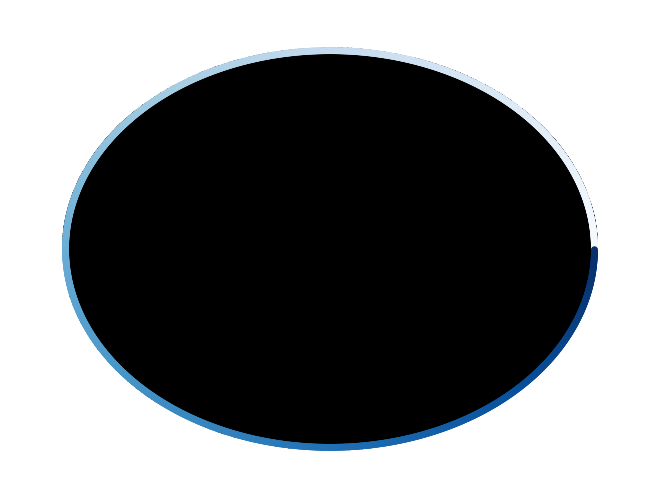

In [127]:
nx.draw_circular(G_hci, with_labels=False, node_color=range(len(G_hci.nodes)), node_size=15, cmap=plt.cm.Blues)
plt.show()

In [121]:
degree_sequence = sorted((d for n, d in G_hci.degree()), reverse=True)
dmax = max(degree_sequence)

Text(0.5, 0, 'Rank')

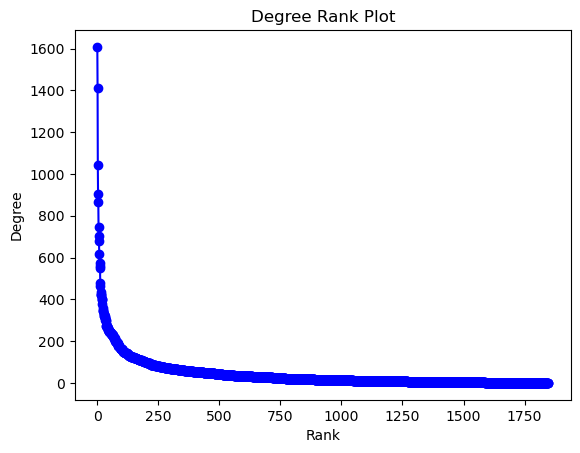

In [124]:
fig, ax = plt.subplots()
ax.plot(degree_sequence, "b-", marker="o")
ax.set_title("Degree Rank Plot")
ax.set_ylabel("Degree")
ax.set_xlabel("Rank")


Yeah that sounds right, like we have a power law(-ish) distribution